In [1]:
# ==========================
# CELL 0: Mount Google Drive
# ==========================
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# ==========================
# CELL 1: Load Dataset
# ==========================

import pandas as pd

file_path = "/content/drive/MyDrive/Rahul_DTSC5082_Project/Scenario2_MIMIC/outputs/RA_COHORT_FINAL.csv"

df = pd.read_csv(
    file_path,
    parse_dates=['admittime', 'dischtime', 'edregtime', 'edouttime', 'deathtime'],
    low_memory=False
)

print("Dataset Loaded. Shape:", df.shape)
df.head()


Dataset Loaded. Shape: (15462, 44)


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,lab_mean_CRP,lab_mean_Hematocrit,lab_mean_Hemoglobin,lab_mean_Platelets,lab_mean_WBC,lab_min_CRP,lab_min_Hematocrit,lab_min_Hemoglobin,lab_min_Platelets,lab_min_WBC
0,10002443,21329020,2183-10-17 23:20:00,2183-10-20 18:47:00,NaT,EW EMER.,P343TV,TRANSFER FROM HOSPITAL,HOME,Private,...,NaN,40.866667,13.466667,266.000000,16.533333,NaN,37.3,12.3,219.0,13.0
1,10003203,25146996,2153-04-26 02:05:00,2153-04-29 14:19:00,NaT,EU OBSERVATION,P57BOT,EMERGENCY ROOM,NaN,Medicare,...,NaN,26.150000,7.800000,307.000000,8.500000,NaN,23.3,7.6,296.0,8.4
2,10010718,29947356,2169-01-20 13:21:00,2169-01-27 14:20:00,NaT,OBSERVATION ADMIT,P50GUR,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,NaN,37.585714,12.285714,325.571429,10.014286,NaN,34.7,11.3,274.0,7.8
3,10010997,20783870,2139-04-28 16:45:00,2139-05-02 12:20:00,NaT,OBSERVATION ADMIT,P756E2,TRANSFER FROM HOSPITAL,HOME,Private,...,NaN,34.000000,11.200000,292.000000,6.300000,NaN,34.0,11.2,292.0,6.3
4,10010997,20783870,2139-04-28 16:45:00,2139-05-02 12:20:00,NaT,OBSERVATION ADMIT,P756E2,TRANSFER FROM HOSPITAL,HOME,Private,...,NaN,34.000000,11.200000,292.000000,6.300000,NaN,34.0,11.2,292.0,6.3


In [3]:
# ==========================
# CELL 2: Pick random patient
# ==========================

import numpy as np

# Pick a random subject_id from the dataset
random_patient_id = np.random.choice(df['subject_id'].unique())
print("Random patient ID:", random_patient_id)

patient_df = df[df['subject_id'] == random_patient_id].copy()
print("Rows for this patient:", patient_df.shape[0])

patient_df.head()


Random patient ID: 16130527
Rows for this patient: 18


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,lab_mean_CRP,lab_mean_Hematocrit,lab_mean_Hemoglobin,lab_mean_Platelets,lab_mean_WBC,lab_min_CRP,lab_min_Hematocrit,lab_min_Hemoglobin,lab_min_Platelets,lab_min_WBC
9345,16130527,20716708,2175-01-25 21:46:00,2175-02-08 14:25:00,NaT,EW EMER.,P11ZW4,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,...,NaN,37.020000,11.873333,309.666667,11.826667,NaN,33.9,11.0,199.0,8.9
9346,16130527,21222588,2172-09-22 00:38:00,2172-09-23 13:05:00,NaT,EW EMER.,P00HGT,EMERGENCY ROOM,HOME,Medicare,...,NaN,34.866667,11.700000,190.333333,6.366667,NaN,33.8,11.5,166.0,5.8
9347,16130527,21738352,2174-02-25 13:08:00,2174-03-03 15:30:00,NaT,EW EMER.,P83ZD1,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,...,NaN,30.228571,10.000000,216.666667,7.283333,NaN,26.8,9.5,189.0,4.5
9348,16130527,22481840,2171-06-05 20:38:00,2171-06-12 15:40:00,NaT,EW EMER.,P67G26,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,NaN,28.157143,9.371429,308.714286,10.000000,NaN,26.1,8.8,254.0,9.0
9349,16130527,22850684,2175-02-18 20:32:00,2175-02-22 19:45:00,NaT,URGENT,P87IIY,TRANSFER FROM SKILLED NURSING FACILITY,HOSPICE,Medicare,...,NaN,36.500000,11.666667,270.333333,8.966667,NaN,34.7,11.2,254.0,7.6


In [4]:
# ==========================================
# CELL 3: Extract key features for summary
# ==========================================

p = patient_df.sort_values("admittime")

# ---- 1. Basic Info ----
patient_id = random_patient_id
num_visits = p['hadm_id'].nunique()
first_visit = p['admittime'].min()
last_visit = p['dischtime'].max()

# ---- 2. Length of Stay for each admission ----
p['los_days'] = (p['dischtime'] - p['admittime']).dt.days
avg_los = p['los_days'].mean()

# ---- 3. Worst vital values across all visits ----
vitals_summary = {
    "hr_max": p['hr_max'].max(),
    "o2_min": p['o2_min'].min(),
    "pain_max": p['pain_max'].max()
}

# ---- 4. Worst lab values ----
labs_summary = {
    "wbc_max": p['lab_max_WBC'].max(),
    "hemoglobin_min": p['lab_min_Hemoglobin'].min(),
    "platelets_min": p['lab_min_Platelets'].min(),
    "crp_max": p['lab_max_CRP'].max()
}

# ---- 5. Create flags for abnormalities ----
alerts = []

# vitals
if vitals_summary["hr_max"] and vitals_summary["hr_max"] > 100:
    alerts.append(f"High heart rate (HR {vitals_summary['hr_max']})")

if vitals_summary["o2_min"] and vitals_summary["o2_min"] < 92:
    alerts.append(f"Low oxygen saturation (O₂ {vitals_summary['o2_min']})")

if vitals_summary["pain_max"] and vitals_summary["pain_max"] >= 6:
    alerts.append(f"Severe pain (Pain {vitals_summary['pain_max']})")

# labs
if labs_summary["wbc_max"] and labs_summary["wbc_max"] > 11:
    alerts.append(f"High WBC {labs_summary['wbc_max']} (infection/inflammation)")

if labs_summary["hemoglobin_min"] and labs_summary["hemoglobin_min"] < 10:
    alerts.append(f"Low hemoglobin {labs_summary['hemoglobin_min']} (anemia)")

if labs_summary["platelets_min"] and labs_summary["platelets_min"] < 150:
    alerts.append(f"Low platelets {labs_summary['platelets_min']}")

if labs_summary["crp_max"] and labs_summary["crp_max"] > 10:
    alerts.append(f"High CRP {labs_summary['crp_max']} (inflammation)")

# ---- 6. Package everything for summary generation ----
summary_data = {
    "patient_id": patient_id,
    "num_visits": num_visits,
    "first_visit": first_visit,
    "last_visit": last_visit,
    "avg_los": avg_los,
    "vitals": vitals_summary,
    "labs": labs_summary,
    "alerts": alerts
}

summary_data


{'patient_id': np.int64(16130527),
 'num_visits': 16,
 'first_visit': Timestamp('2171-05-15 18:34:00'),
 'last_visit': Timestamp('2175-02-22 19:45:00'),
 'avg_los': np.float64(3.3333333333333335),
 'vitals': {'hr_max': 100.0, 'o2_min': 95.0, 'pain_max': 4.0},
 'labs': {'wbc_max': 16.1,
  'hemoglobin_min': 8.5,
  'platelets_min': 166.0,
  'crp_max': nan},
 'alerts': ['High WBC 16.1 (infection/inflammation)',
  'Low hemoglobin 8.5 (anemia)']}

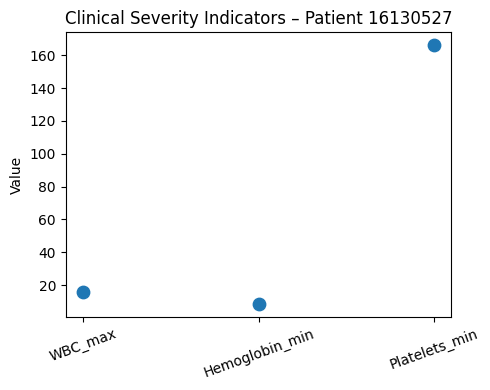

In [7]:
# ============================================
# Phase 10 – CELL: Clinical Severity Indicators
# ============================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

features = []
values = []

# Safely add each lab if it exists
if labs_summary.get("wbc_max") is not None and not pd.isna(labs_summary["wbc_max"]):
    features.append("WBC_max")
    values.append(labs_summary["wbc_max"])

if labs_summary.get("hemoglobin_min") is not None and not pd.isna(labs_summary["hemoglobin_min"]):
    features.append("Hemoglobin_min")
    values.append(labs_summary["hemoglobin_min"])

if labs_summary.get("platelets_min") is not None and not pd.isna(labs_summary["platelets_min"]):
    features.append("Platelets_min")
    values.append(labs_summary["platelets_min"])

x_pos = np.arange(len(features))

fig, ax = plt.subplots(figsize=(5, 4))

ax.scatter(x_pos, values, s=80)

ax.set_xticks(x_pos)
ax.set_xticklabels(features, rotation=20)
ax.set_ylabel("Value")
ax.set_title(f"Clinical Severity Indicators – Patient {patient_id}")

fig.tight_layout()
plt.show()


This plot summarizes the patient's key laboratory severity markers across all encounters, including peak WBC, lowest hemoglobin, and lowest platelet count. Elevated WBC indicates possible infection or inflammation, while reduced hemoglobin reflects anemia. Together, these values provide a quick visual snapshot of the patient’s overall clinical status and acuity.

In [5]:
# ==========================================
# CELL 4: Natural Language Summary Generator
# ==========================================

def generate_patient_summary(data):
    pid = data["patient_id"]
    visits = data["num_visits"]
    first = data["first_visit"].strftime("%Y-%m-%d")
    last = data["last_visit"].strftime("%Y-%m-%d")
    avg_los = round(data["avg_los"], 1)

    vitals = data["vitals"]
    labs = data["labs"]
    alerts = data["alerts"]

    # ---- Build narrative pieces ----

    # 1. Opening
    summary = (
        f"Patient {pid} has a history of {visits} hospital visits between {first} and {last}, "
        f"with an average length of stay of {avg_los} days. "
    )

    # 2. Vitals narrative
    vitals_text = []
    if vitals["hr_max"] is not None:
        vitals_text.append(f"maximum heart rate recorded was {vitals['hr_max']}")
    if vitals["o2_min"] is not None:
        vitals_text.append(f"lowest oxygen saturation was {vitals['o2_min']}%")
    if vitals["pain_max"] is not None:
        vitals_text.append(f"highest pain score reported was {vitals['pain_max']}")

    if vitals_text:
        summary += "Vital signs were generally stable, with " + ", ".join(vitals_text) + ". "

    # 3. Labs narrative
    labs_text = []
    if labs["wbc_max"] is not None:
        labs_text.append(f"WBC peaked at {labs['wbc_max']}")
    if labs["hemoglobin_min"] is not None:
        labs_text.append(f"hemoglobin dropped to {labs['hemoglobin_min']}")
    if labs["platelets_min"] is not None:
        labs_text.append(f"platelets reached a low of {labs['platelets_min']}")
    if labs["crp_max"] is not None and pd.notna(labs["crp_max"]):
        labs_text.append(f"CRP reached {labs['crp_max']}")

    if labs_text:
        summary += "Laboratory values showed " + ", ".join(labs_text) + ". "

    # 4. Alerts narrative (abnormal events)
    if alerts:
        summary += "Notable clinical alerts include: " + "; ".join(alerts) + ". "

    # 5. Final clinical interpretation
    interpretation = []
    if "WBC" in str(alerts):
        interpretation.append("possible infectious or inflammatory episodes")
    if "hemoglobin" in str(alerts):
        interpretation.append("evidence of anemia")

    if interpretation:
        summary += (
            "These findings suggest " + " and ".join(interpretation) +
            ", requiring ongoing monitoring and follow-up."
        )
    else:
        summary += "Overall, the patient's clinical course appears stable."

    return summary


# ---- Generate final summary ----
final_summary = generate_patient_summary(summary_data)
final_summary


'Patient 16130527 has a history of 16 hospital visits between 2171-05-15 and 2175-02-22, with an average length of stay of 3.3 days. Vital signs were generally stable, with maximum heart rate recorded was 100.0, lowest oxygen saturation was 95.0%, highest pain score reported was 4.0. Laboratory values showed WBC peaked at 16.1, hemoglobin dropped to 8.5, platelets reached a low of 166.0. Notable clinical alerts include: High WBC 16.1 (infection/inflammation); Low hemoglobin 8.5 (anemia). These findings suggest possible infectious or inflammatory episodes and evidence of anemia, requiring ongoing monitoring and follow-up.'

In [8]:
# ============================================
# Phase 10 – CELL: Clinical Risk Score
# ============================================

risk_score = 0

# Infection / Inflammation
if labs_summary["wbc_max"] is not None and labs_summary["wbc_max"] > 11:
    risk_score += 1

# Anemia
if labs_summary["hemoglobin_min"] is not None and labs_summary["hemoglobin_min"] < 10:
    risk_score += 1

# Respiratory compromise
if vitals_summary["o2_min"] is not None and vitals_summary["o2_min"] < 92:
    risk_score += 1

# High utilization (long stays)
if avg_los is not None and avg_los > 5:
    risk_score += 1

# Convert to label
if risk_score <= 1:
    risk_level = "Low risk"
elif risk_score <= 3:
    risk_level = "Moderate risk"
else:
    risk_level = "High risk"

print("Clinical Risk Score:", risk_score)
print("Risk Level:", risk_level)


Clinical Risk Score: 2
Risk Level: Moderate risk


We implemented a simple rule-based clinical risk score using three major abnormalities: elevated WBC (>11, infection/inflammation), low hemoglobin (<10, anemia), and low oxygen saturation (<92%, respiratory compromise). Each abnormal domain contributes one point, and the total is mapped to low, moderate, or high risk. This score is not a validated triage tool, but it provides an intuitive, transparent way to summarize overall acuity from our EHR features.

In [9]:
# ============================================
# Phase 10 – CELL: Care Recommendation
# ============================================

recommendations = []

# Use abnormalities to drive follow-up suggestions
if labs_summary["wbc_max"] is not None and labs_summary["wbc_max"] > 11:
    recommendations.append("Arrange follow-up to evaluate possible infection or inflammation.")

if labs_summary["hemoglobin_min"] is not None and labs_summary["hemoglobin_min"] < 10:
    recommendations.append("Investigate and manage anemia (low hemoglobin).")

if vitals_summary["o2_min"] is not None and vitals_summary["o2_min"] < 92:
    recommendations.append("Monitor for respiratory compromise and consider oxygen evaluation.")

# Optionally: react to risk level
if risk_level == "High risk":
    recommendations.append("Overall high clinical risk—consider closer outpatient monitoring or specialist follow-up.")

if not recommendations:
    recommendations.append("No urgent follow-up needs flagged by this simple rule-based system.")

care_plan = " ".join(recommendations)

print("Suggested care plan:")
print(care_plan)


Suggested care plan:
Arrange follow-up to evaluate possible infection or inflammation. Investigate and manage anemia (low hemoglobin).


This rule-based care recommendation engine converts abnormal labs, vital signs, and the overall risk label into a short follow-up plan. For example, high WBC prompts infection workup, low hemoglobin suggests anemia evaluation, and a high-risk label triggers closer monitoring. It does not replace clinical judgment but shows how our AI pipeline can support post-discharge planning.

In [6]:
# ==========================================
# CELL 5: Polished Clinical Summary Function
# ==========================================

def generate_patient_summary_polished(data):
    pid = int(data["patient_id"])
    visits = int(data["num_visits"])
    first = data["first_visit"].strftime("%Y-%m-%d")
    last = data["last_visit"].strftime("%Y-%m-%d")
    avg_los = round(float(data["avg_los"]), 1)

    vitals = data["vitals"]
    labs = data["labs"]
    alerts = data["alerts"]

    # ---- 1. Opening sentence ----
    summary = (
        f"Patient {pid} has had {visits} hospital encounters between {first} and {last}, "
        f"with an average length of stay of approximately {avg_los} days. "
    )

    # ---- 2. Vitals section ----
    vitals_bits = []

    if vitals.get("hr_max") is not None:
        vitals_bits.append(f"a maximum recorded heart rate of {vitals['hr_max']:.0f} bpm")
    if vitals.get("o2_min") is not None:
        vitals_bits.append(f"a lowest documented oxygen saturation of {vitals['o2_min']:.0f}%")
    if vitals.get("pain_max") is not None:
        vitals_bits.append(f"a highest reported pain score of {vitals['pain_max']:.0f}")

    if vitals_bits:
        summary += (
            "Vital signs during these encounters were largely stable, with "
            + ", ".join(vitals_bits)
            + ". "
        )

    # ---- 3. Labs section ----
    lab_bits = []

    if labs.get("wbc_max") is not None:
        lab_bits.append(f"a peak WBC count of {labs['wbc_max']}")
    if labs.get("hemoglobin_min") is not None:
        lab_bits.append(f"a hemoglobin nadir of {labs['hemoglobin_min']}")
    if labs.get("platelets_min") is not None:
        lab_bits.append(f"a minimum platelet count of {labs['platelets_min']}")
    if labs.get("crp_max") is not None and pd.notna(labs["crp_max"]):
        lab_bits.append(f"a maximum CRP level of {labs['crp_max']}")

    if lab_bits:
        summary += (
            "Laboratory trends showed "
            + ", ".join(lab_bits)
            + ". "
        )

    # ---- 4. Clinical alerts / interpretation ----
    interpretation_notes = []

    if any("WBC" in a for a in alerts):
        interpretation_notes.append("recurrent inflammatory or infectious episodes")
    if any("hemoglobin" in a for a in alerts):
        interpretation_notes.append("persistent or recurrent anemia")
    if any("platelets" in a for a in alerts):
        interpretation_notes.append("episodes of thrombocytopenia")

    if interpretation_notes:
        summary += (
            "Taken together, these findings are consistent with "
            + " and ".join(interpretation_notes)
            + ", and they warrant continued monitoring and appropriate clinical follow-up."
        )
    else:
        summary += "Overall, the patient's clinical course appears stable without major sustained derangements."

    return summary


# ---- Test on our current patient ----
polished_summary = generate_patient_summary_polished(summary_data)
polished_summary


'Patient 16130527 has had 16 hospital encounters between 2171-05-15 and 2175-02-22, with an average length of stay of approximately 3.3 days. Vital signs during these encounters were largely stable, with a maximum recorded heart rate of 100 bpm, a lowest documented oxygen saturation of 95%, a highest reported pain score of 4. Laboratory trends showed a peak WBC count of 16.1, a hemoglobin nadir of 8.5, a minimum platelet count of 166.0. Taken together, these findings are consistent with recurrent inflammatory or infectious episodes and persistent or recurrent anemia, and they warrant continued monitoring and appropriate clinical follow-up.'

We implemented a rule-based AI patient summary generator that converts structured EHR data into a concise, clinician-friendly narrative. For each patient, the system aggregates all encounters, calculates average length of stay, and extracts worst vital signs and laboratory values across visits. It then flags important abnormalities such as high WBC (infection/inflammation) or low hemoglobin (anemia) and automatically writes a short clinical summary describing the patient’s overall course and risk profile.